In [1]:
%cd ../../

/mnt/c/Users/aryam/Documents/school/year2/spring/DSC291 - Large Scale Statistical Analysis/project/species-gene-coexp


In [2]:
data = "data/data.tsv"

In [4]:
%%bash -s "$data"
head "$1"

Subclass	Gene	Transcript	Mouse_gene_TPM	Human_gene_TPM	Mouse_Isoform_Proportion	Human_Isoform_Proportion
Astro	TSPAN6	ENST00000373020.8	45.27	86.94	0.97283	0.994364
Astro	DPM1	ENST00000371582.8	213.19	88.54	0.294479	0.0754461
Astro	DPM1	ENST00000371588.9	213.19	88.54	0.670435	0.762932
Astro	FUCA2	ENST00000002165.10	142.11	26.09	0.987123	0.992718
Astro	GCLC	ENST00000509541.5	28.15	36.55	0.0035524	0.79316
Astro	GCLC	ENST00000650454.1	28.15	36.55	0.398934	0.149932
Astro	LAS1L	ENST00000374804.9	25.03	47.6	0.0103875	0.353782
Astro	LAS1L	ENST00000374807.9	25.03	47.6	0.988813	0.000420168
Astro	LAS1L	ENST00000469091.1	25.03	47.6	0.000799041	0.645798


First, let's get the mouse dataset.

In [6]:
%%bash -s "$data"
cut -f1-4 "$1" | head

Subclass	Gene	Transcript	Mouse_gene_TPM
Astro	TSPAN6	ENST00000373020.8	45.27
Astro	DPM1	ENST00000371582.8	213.19
Astro	DPM1	ENST00000371588.9	213.19
Astro	FUCA2	ENST00000002165.10	142.11
Astro	GCLC	ENST00000509541.5	28.15
Astro	GCLC	ENST00000650454.1	28.15
Astro	LAS1L	ENST00000374804.9	25.03
Astro	LAS1L	ENST00000374807.9	25.03
Astro	LAS1L	ENST00000469091.1	25.03


Now, let's get the human dataset.

In [10]:
%%bash -s "$data"
cut -f1-3,5 "$1" | head

Subclass	Gene	Transcript	Human_gene_TPM
Astro	TSPAN6	ENST00000373020.8	86.94
Astro	DPM1	ENST00000371582.8	88.54
Astro	DPM1	ENST00000371588.9	88.54
Astro	FUCA2	ENST00000002165.10	26.09
Astro	GCLC	ENST00000509541.5	36.55
Astro	GCLC	ENST00000650454.1	36.55
Astro	LAS1L	ENST00000374804.9	47.6
Astro	LAS1L	ENST00000374807.9	47.6
Astro	LAS1L	ENST00000469091.1	47.6


# Difference between mouse and human gene expression

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

In [48]:
tpm = pd.read_csv("data/data.tsv", sep="\t", header=0, index_col=list(range(3)), usecols=list(range(5)))
tpm.head()

Mouse_gene_TPM  Human_gene_TPM
Subclass Gene   Transcript                                        
Astro    TSPAN6 ENST00000373020.8            45.27           86.94
         DPM1   ENST00000371582.8           213.19           88.54
                ENST00000371588.9           213.19           88.54
         FUCA2  ENST00000002165.10          142.11           26.09
         GCLC   ENST00000509541.5            28.15           36.55

In [49]:
# just get the first transcript in each gene
tpm = tpm.groupby(['Subclass', 'Gene']).first()
tpm.head()

Mouse_gene_TPM  Human_gene_TPM
Subclass Gene                                  
Astro    AAAS             16.24          121.01
         AACS             36.53           19.05
         AAMDC            40.93           50.30
         AAMP             40.81           26.85
         AARSD1           37.88           56.02

In [52]:
# rename the columns
tpm.columns = ['mouse', 'human']
tpm.head()

mouse   human
Subclass Gene                 
Astro    AAAS    16.24  121.01
         AACS    36.53   19.05
         AAMDC   40.93   50.30
         AAMP    40.81   26.85
         AARSD1  37.88   56.02

In [57]:
# take the log of the TPM values
for col in tpm.columns:
    tpm[col] = tpm[col].apply(np.log)
tpm.head()

mouse     human
Subclass Gene                      
Astro    AAAS    1.025137  1.567756
         AACS    1.280415  1.080810
         AAMDC   1.311534  1.365583
         AAMP    1.310743  1.190968
         AARSD1  1.290450  1.392701

<AxesSubplot:ylabel='Count'>

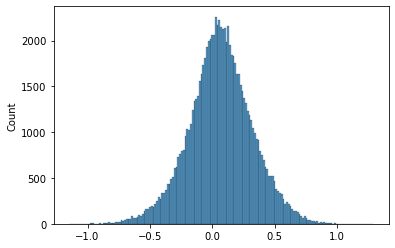

In [60]:
sns.histplot(tpm['mouse'] - tpm['human'])